## Importing required libraries

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

In [109]:
# Reading the data
data=pd.read_csv(r"C:\Users\Lenovo\Downloads\Titanic_Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
data.shape

(891, 12)

In [111]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [113]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Here the data is balanced because the ratio of two classes are 40:60

In [114]:
import warnings
warnings.filterwarnings('ignore')

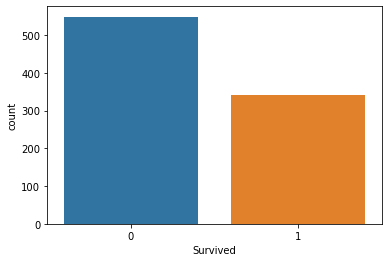

In [115]:
sns.countplot('Survived', data=data)
plt.show()

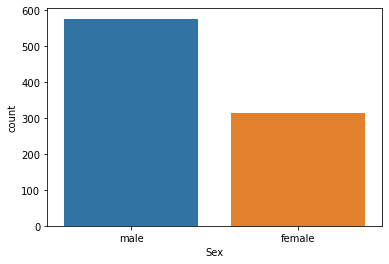

In [116]:
sns.countplot('Sex',data=data)
plt.show()

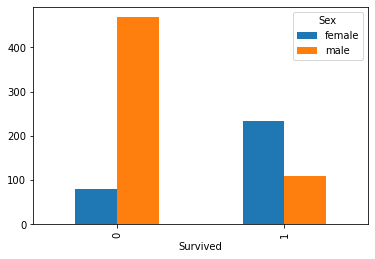

In [117]:
pd.crosstab(data['Survived'],data['Sex']).plot(kind='bar')
plt.show()

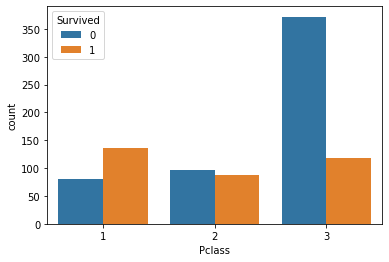

In [118]:
sns.countplot('Pclass', hue='Survived', data=data)
plt.show()

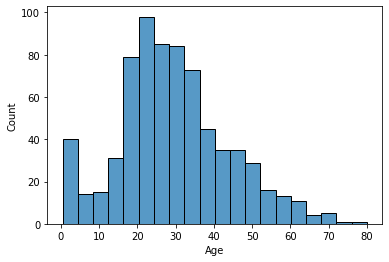

In [119]:
sns.histplot(data.Age)
plt.show()

Here most number of people are aged less than 60 and the frequency of people is high for age group between 15-50.

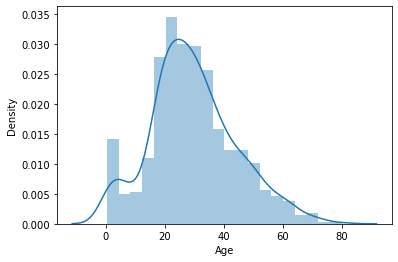

In [120]:
sns.distplot(data.Age)
plt.show()

Here the Age variable is right skewed because the distribution is shifted to the left with its tail on the right side

<AxesSubplot:xlabel='Fare', ylabel='Density'>

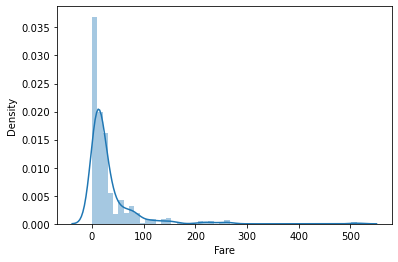

In [121]:
sns.distplot(data.Fare)

Here the 'Fare' variable is positively skewed because the distribution is shifted to the left with its tail on the right side

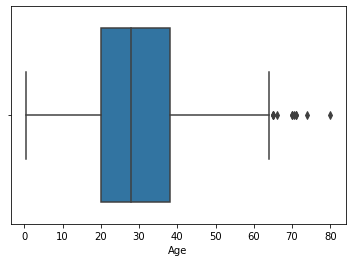

In [122]:
sns.boxplot(data['Age'])
plt.show()

Here we can observe that 50% of the passengers are aged between 20-40

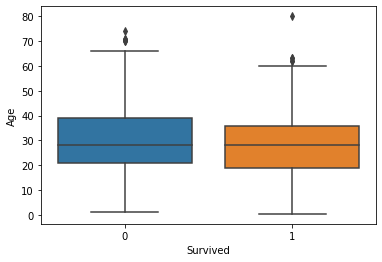

In [123]:
sns.boxplot(data.Survived,data.Age) 
plt.show()

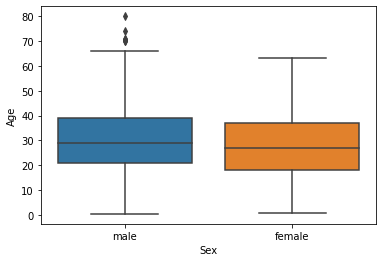

In [124]:
sns.boxplot(data.Sex,data.Age) 
plt.show()

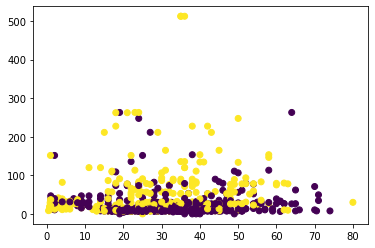

In [125]:
plt.scatter(data["Age"],data["Fare"],c=data["Survived"])
plt.show()

Here we can see that there is no correlation between the 'Age' and 'Fare' variables

In [126]:
# Checking for duplicated values
data[data.duplicated()].shape

(0, 12)

In [127]:
# Dropping irrelevant columns
data=data.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)

In [128]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [129]:
# Converting categorical column to numerical column
data=pd.get_dummies(data)

In [130]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [131]:
#Checking for null values
data.isnull().sum() 

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [132]:
#Imputing missing vallue by median
data['Age']=data['Age'].fillna(data['Age'].median())    

In [133]:
# Checking for null values
data.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [26]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [27]:
# Dropping two tables Age and fare
data=data.drop(['Age','Fare'],axis=1)

In [28]:
data.head()

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,0,1,0,0,1
1,1,1,1,0,1,0,1,0,0
2,1,3,0,0,1,0,0,0,1
3,1,1,1,0,1,0,0,0,1
4,0,3,0,0,0,1,0,0,1


### Data transformation

In [29]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
titanic = pd.DataFrame(scale.fit_transform(data.iloc[:,[2,5]]),columns=['Age','Fare'])
titanic.head()

,Age,Fare
0,0.125,1.0
1,0.125,0.0
2,0.000,0.0
3,0.125,0.0
4,0.000,1.0


In [30]:
# Joining two tables
titanic_data=pd.concat([data,titanic],axis=1)
titanic_data.head()

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age,Fare
0,0,3,1,0,0,1,0,0,1,0.125,1.0
1,1,1,1,0,1,0,1,0,0,0.125,0.0
2,1,3,0,0,1,0,0,0,1,0.000,0.0
3,1,1,1,0,1,0,0,0,1,0.125,0.0
4,0,3,0,0,0,1,0,0,1,0.000,1.0


In [31]:
X=titanic_data.iloc[:,1:]
Y=titanic_data.iloc[:,0]

In [85]:
#Splittting into train and test data
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=123)

## Logistic Regression

In [66]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [67]:
classifier.coef_ 

array([[-0.87454856, -0.23224286,  0.0372618 ,  0.88194575, -0.88204086,
         0.14522154, -0.03366692, -0.25727375, -0.02903036, -0.88204086]])

prediction=classifier.predict(data_test)

In [68]:
#Predicting on test data
preds = classifier.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

0    113
1     66
dtype: int64

In [69]:
# Finding accuracy
acc1=metrics.accuracy_score(preds,y_test)
acc1

0.8044692737430168

## Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
RF=RandomForestClassifier(n_estimators=500,max_features=7,random_state=8)

In [72]:
RF.fit(x_train,y_train)

RandomForestClassifier(max_features=7, n_estimators=500, random_state=8)

In [73]:
predict=RF.predict(x_test)

In [74]:
#Predicting on test data
pd.Series(predict).value_counts() # getting the count of each category

0    124
1     55
dtype: int64

In [75]:
acc2=metrics.accuracy_score(predict,y_test)
acc2

0.8324022346368715

# Naive Bayes

In [76]:
from sklearn.naive_bayes import GaussianNB

In [77]:
model=GaussianNB()
model=model.fit(x_train,y_train)

In [78]:
y_predict=model.predict(x_test)
y_predict

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [79]:
acc3=metrics.accuracy_score(y_test,y_predict)
acc3

0.8100558659217877

## Model Comparison Table

In [84]:
DataFrame= pd.DataFrame({'Model':['Logistic_Regression','Random_Forest','Naive Bayes'],
                         'Accuracy':[acc1,acc2,acc3]},index=[1,2,3])
DataFrame

,Model,Accuracy
1,Logistic_Regression,0.804469
2,Random_Forest,0.832402
3,Naive Bayes,0.810056


Here we select Random Forest as best model because it gives high accuracy compared to other models. 